# McKinney Chapter 11 - Practice for Section 02

## Announcements

1. I finished grading Project 1
    1. Before peer reviews, the median grade is 84% (mean is 84.4%)
    1. Assuming perfect peer reviews, the median grade is 87% (mean is 87.1%)
    2. Peer review scores on Canvas are the median peer review scores on Teammates because medians ignore outliers
    3. 97.1% of students received perfect peer review scores
    4. Only 1.2% of students received peer review scores less than 90%
    5. I posted a barebones solution to the Project 1 assignment page on Canvas
1. 10,000 XP on DataCamp
   1. Due by Fri5ay, 3/16, at 11:59 PM
   2. Upload a screenshot of your DataCamp profile page with XP to Canvas
1. I will post Project 2 by Thursday morning and we will discuss it on Thursday and Friday

## 10-Minute Recap

The time-series functionality in pandas is fantastic!
Here are the three main tools we will use:

1. `.shift()` method
    1. The `.shift()` method is used to shift the index of a DataFrame by a specified number of periods.
    1. It is useful for calculating percentage changes, differences between time periods, and other time series calculations.
    1. The method can be used to shift both forward and backward in time.
1. `.resample()` method
    1. The `.resample()` method is used to resample time-series data.
    1. It is used to convert time series data from one frequency to another.
    1. The method can be used to upsample (increase the frequency of the data) or downsample (decrease the frequency of the data).
1. `.rolling()` method
    1. The `.rolling()` method is used to perform rolling window calculations on sequential data.
    1. A rolling window is a fixed-size interval or subset of data that moves sequentially through a larger dataset.
    1. The method is useful for calculating moving averages, standard deviations, and other rolling window calculations.

##  Practice

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf

In [2]:
%precision 4
pd.options.display.float_format = '{:.4f}'.format
%config InlineBackend.figure_format = 'retina'

### Download daily returns for ten portfolios formed on book-to-market ratios

We can use a list comprehension with an `if` statement to find the name of the file with portfolios formed on book-to-market ratios.
Book-to-market ratios are also called B/M ratios, and French includes "Portfolios" and "BE-ME" in the files with these portfolio returns.

In [3]:
[x for x in pdr.famafrench.get_available_datasets() if ('Portfolios' in x) and ('BE-ME' in x)][:5]

['Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Developed_6_Portfolios_ME_BE-ME',
 'Developed_6_Portfolios_ME_BE-ME_daily']

In [4]:
be_me_all = pdr.DataReader(
    name='Portfolios_Formed_on_BE-ME_Daily',
    data_source='famafrench',
    start='1900'
)

C:\Users\r.herron\AppData\Local\Temp\ipykernel_24516\616375102.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  be_me_all = pdr.DataReader(
C:\Users\r.herron\AppData\Local\Temp\ipykernel_24516\616375102.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  be_me_all = pdr.DataReader(


The value for the "DESCR" key shows how French creates these data (i.e., he forms portfolios at the end of every June) and what each data frame contains.
The 0 key selects returns on value-weighted portfolios, and the 1 key selects returns on equal-weighted portfolios.

In [5]:
print(be_me_all['DESCR'])

Portfolios Formed on BE-ME Daily
--------------------------------

This file was created by CMPT_BEME_RETS_DAILY using the 202401 CRSP database. It contains value- and equal-weighted returns for portfolios formed on BE/ME. The portfolios are constructed at the end of June. BE/ME is book equity at the last fiscal year end of the prior calendar year divided by ME at the end of December of the prior year. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. The break points use Compustat firms plus the firms hand-collected from the Moodys Industrial, Utilities, Transportation, and Financial Manuals. The break points include utilities. The portfolios use Compustat firms plus the firms hand-collected from the Moodys Industrial, Utilities, Transportation, and Financial Manuals. The portfolios include utilities.

  0 : Value Weighted Returns -- Daily (25670 rows x 19 cols)
  1 : Equal Weighted Returns -- Daily (25670 rows x 19 cols)


Each data frame has several groups of portfolios:

1. The first column provides the returns on a portfolio of negative book equity stocks. The next 18 columns split the positive book equity stocks into 3, 5, and 10 portfolios based on their B/M ranks.
1. The next 3 columns provide 3 portfolios split on the 30th and 70th percentiles of B/M.
2. The next 5 columns provide 5 portfolios split on the 20th, 40th, 60th, and 80th percentiles of B/M (i.e., quintiles).
3. The last 10 columns provide 10 portfolios split on the 10th, 20th, ..., and 90th percentiles of B/M (i.e., deciles).

We can assign the value-weighted B/M-decile portfolio returns to data frame `be_me_vw`.

In [6]:
be_me_vw = (
    be_me_all # all data frames
    [0] # select the value-weighted portfolio returns
    .iloc[:, -10:] # slice the rightmost ten columns
    .div(100) # convert from percent to decimal
    .rename_axis(columns='B/M Portfolio') # label colums for easy plots
)

be_me_vw

B/M Portfolio,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,
1926-07-01,0.0014,0.0044,-0.0012,0.0009,0.0019,0.0038,-0.0032,-0.0011,0.0028,-0.0044
1926-07-02,0.0044,0.0043,0.0066,0.0044,0.0061,0.0015,0.0061,0.0019,0.0044,-0.0011
1926-07-06,0.0037,0.0000,0.0054,0.0027,0.0007,0.0004,-0.0002,-0.0043,0.0016,0.0012
1926-07-07,-0.0004,-0.0003,0.0032,0.0032,0.0001,0.0020,-0.0023,0.0059,0.0053,-0.0030
1926-07-08,0.0067,-0.0003,0.0030,0.0038,-0.0009,0.0027,-0.0003,0.0057,0.0025,0.0073
...,...,...,...,...,...,...,...,...,...,...
2024-01-25,-0.0023,0.0071,0.0120,0.0082,0.0100,0.0115,0.0117,0.0095,0.0092,0.0146
2024-01-26,-0.0031,0.0044,0.0016,-0.0003,0.0026,0.0023,0.0039,0.0073,-0.0148,0.0067
2024-01-29,0.0110,0.0078,0.0094,0.0088,0.0095,0.0048,0.0029,0.0079,0.0076,0.0085


We can easily visualize these portfolio returns with the arithmetic and geometric means of these portfolio returns.

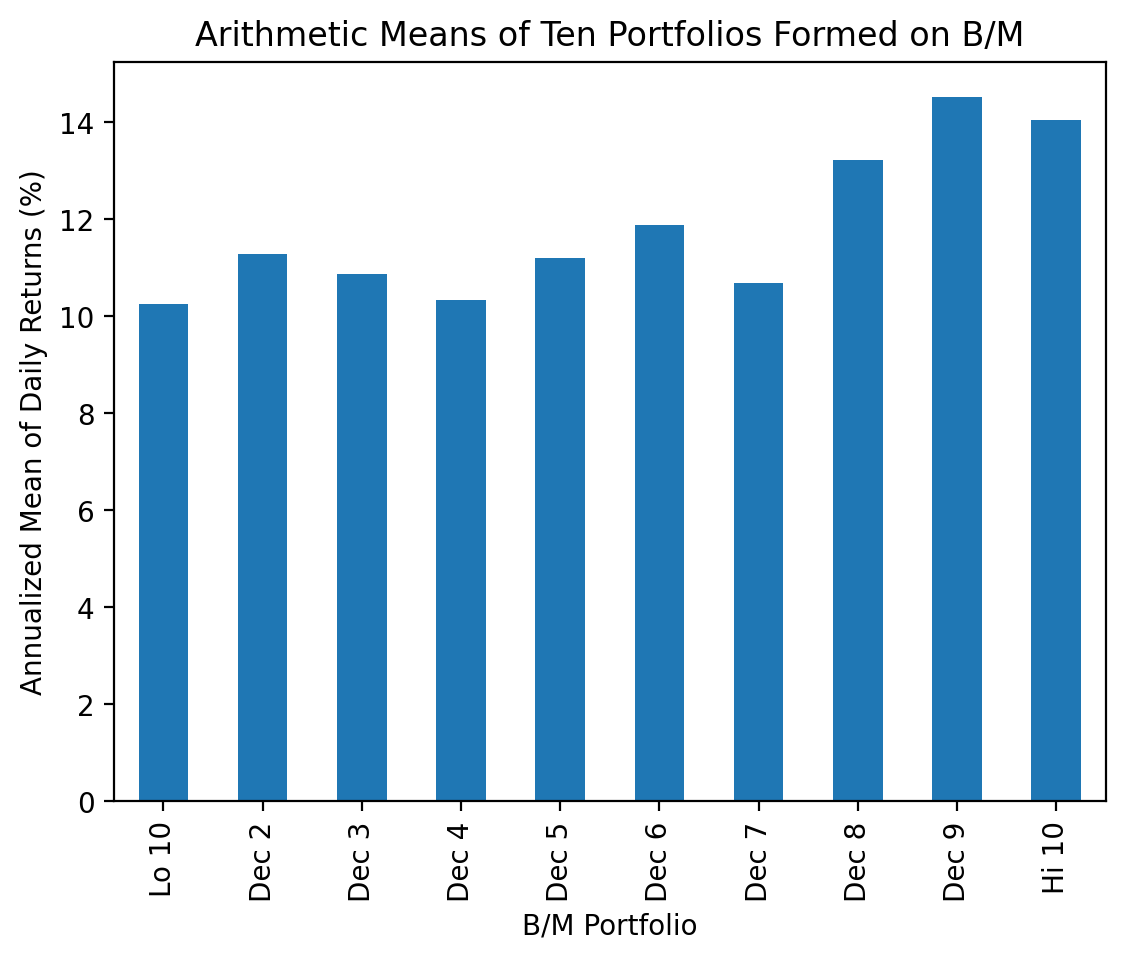

In [7]:
(
    be_me_vw
    .mean() # arithmetic mean
    .mul(252) # annualize
    .mul(100) # convert to percent
    .plot(kind='bar')
)

plt.ylabel('Annualized Mean of Daily Returns (%)')
plt.title('Arithmetic Means of Ten Portfolios Formed on B/M')
plt.show()

In finance, we often call the annualized geometric mean the "compounded annualized growth rate" or "CAGR".
The geoemetric mean of daily returns is $1 + r_{geom} = \left[ \prod_{t}^T (1+r_t) \right]^{\frac{1}{T}}$, where $r_t$ is the return on day $t$.
The CAGR is the annualized geometric mean of daily returns, so $1 + CAGR = (1 + r_{geom})^{252}$ and $CAGR = \left[ \prod_{t}^T (1+r_t) \right]^{\frac{252}{T}} - 1$.

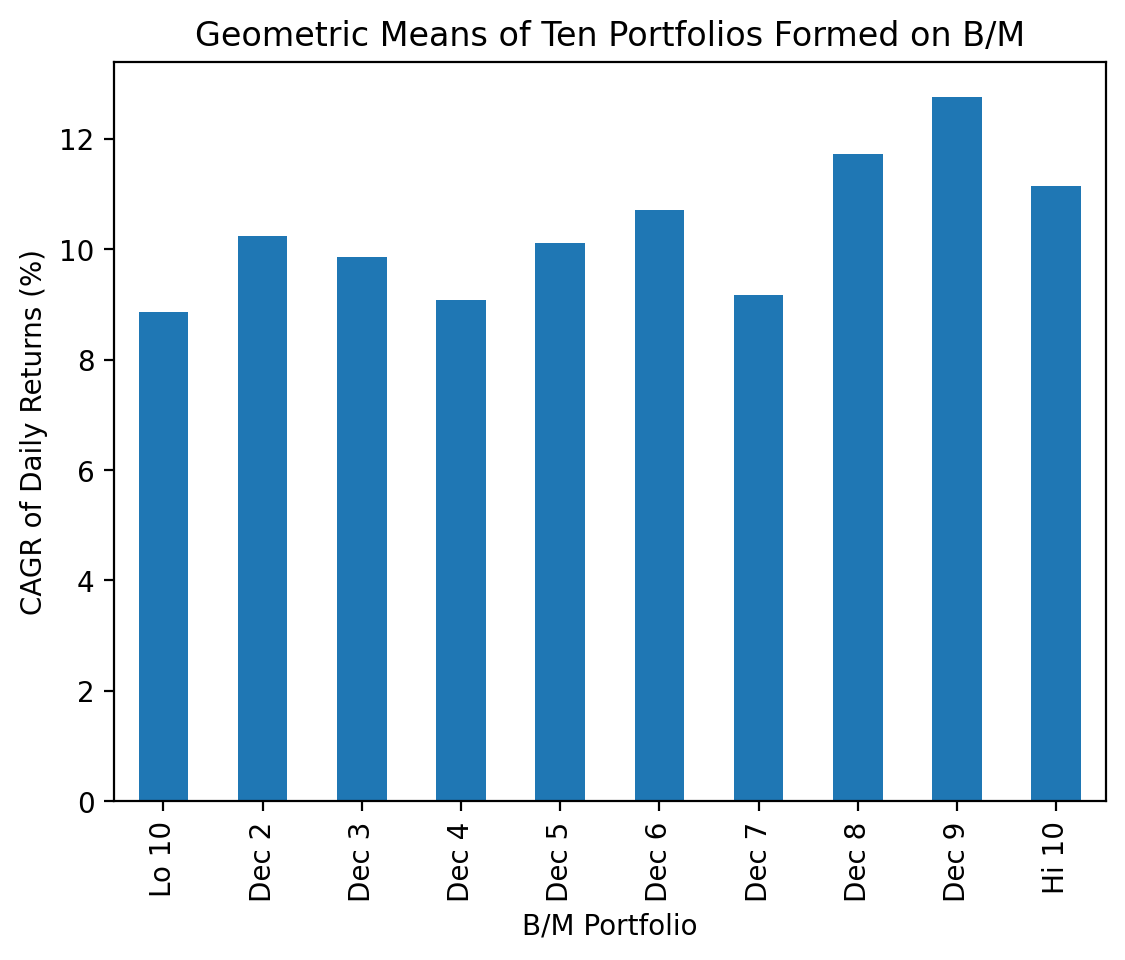

In [8]:
(
    be_me_vw
    .apply(lambda x: (1 + x).prod()**(252 / x.count()) - 1) # annualized geometric mean or CAGR
    .mul(100) # convert to percent
    .plot(kind='bar')
)

plt.ylabel('CAGR of Daily Returns (%)')
plt.title('Geometric Means of Ten Portfolios Formed on B/M')
plt.show()

### Calculate cumulative returns with all available data

We have done calculations and plots of cumulative returns for several weeks, and these do not use the `.shift()`, `.resample()`, or `.rolling()` methods.

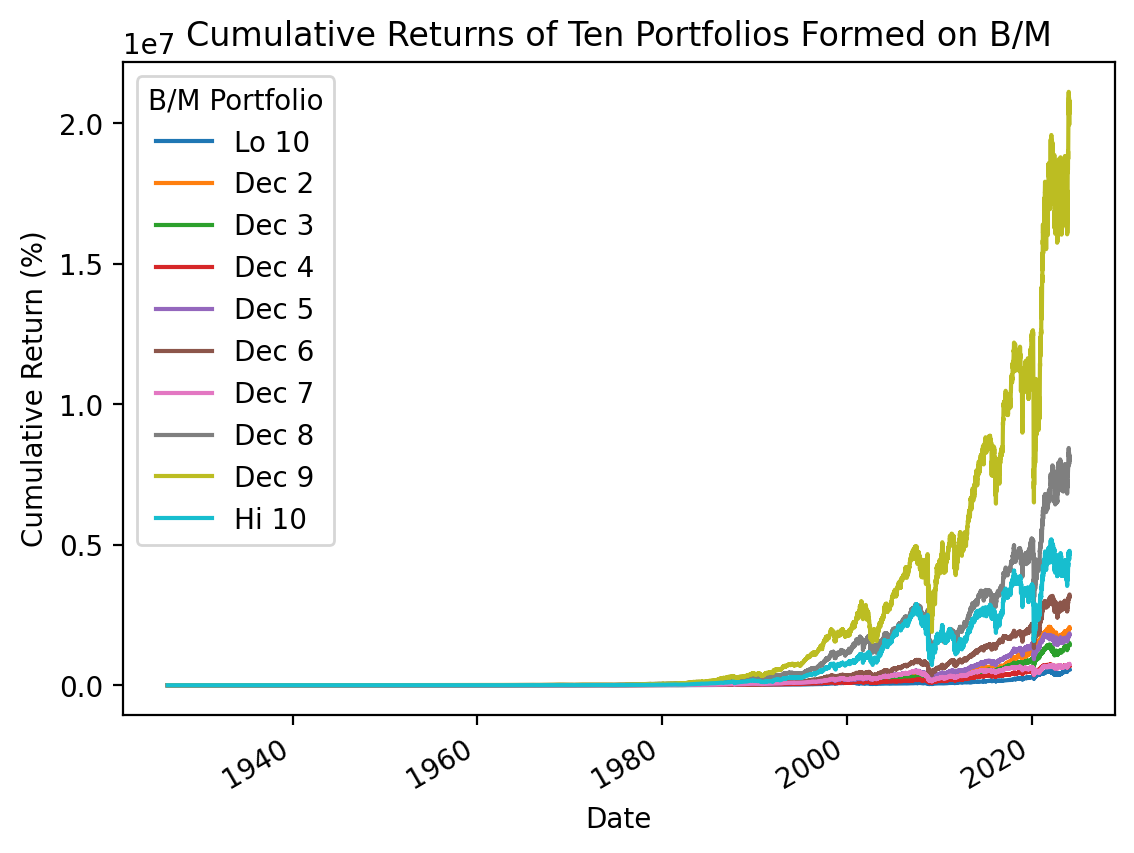

In [9]:
(
    be_me_vw
    .add(1)
    .cumprod() # compound cumulative returns
    .sub(1)
    .mul(100) # convert to percent
    .plot()
)

plt.ylabel('Cumulative Return (%)')
plt.title('Cumulative Returns of Ten Portfolios Formed on B/M')
plt.show()

### Calculate total returns for each calendar year

We use the `.resample()` method to downsample our daily returns to annual returns.
Note that we must `.add(1)` to our returns *before* we `.resample()` because we can only associate one method with the resampling.
We could `.apply()` a lambda function that does the compounding one step, but optimized methods like `.prod()` are generally faster than `.apply()`.

In [10]:
(
    be_me_vw
    .add(1) # must add 1 before .resample()
    .resample(rule='A', kind='period') # down sample to annual periods
    .prod() # use product to compound (1+r)s each year
    .sub(1) # subtract 1 after compounding
)

B/M Portfolio,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,
1926,0.0819,0.0309,0.2793,0.0899,0.0248,0.0825,0.1265,0.1038,0.0510,0.0958
1927,0.5773,0.2518,0.4298,0.2015,0.2041,0.2611,0.2832,0.2471,0.3844,0.4825
1928,0.4880,0.4965,0.3961,0.3724,0.4677,0.2581,0.1484,0.3331,0.3740,0.2668
1929,-0.2691,-0.0844,-0.1469,-0.0664,-0.0039,-0.0147,-0.0096,-0.0830,-0.0830,-0.2550
1930,-0.2911,-0.2067,-0.2679,-0.2757,-0.2531,-0.3514,-0.3858,-0.4110,-0.5280,-0.5669
...,...,...,...,...,...,...,...,...,...,...
2020,0.4815,0.3129,0.2160,0.1451,0.0720,0.0862,-0.1662,-0.0139,0.0187,-0.1113
2021,0.2373,0.2334,0.2867,0.1776,0.1296,0.3196,0.2543,0.3685,0.3981,0.4465
2022,-0.2962,-0.2218,-0.1847,-0.0814,-0.1003,-0.1435,-0.0183,0.0804,-0.0044,-0.0418


### Calculate total returns over rolling 252-trading-day windows

We specify the window as an integer (252 observations), so the `.rolling()` method defaults the `min_periods` argument to the same integer (252 observations).
As a result, the `.rolling()` method needs a minimum of 252 periods before it applies our function, and the first 251 observations are missing below.
Also, pandas does not provide a `.prod()` method that works with the `.rolling()` method, so we must manually perform this calculation with `.apply()`

In [11]:
%%time
be_me_rr_1 = (
    be_me_vw
    .rolling(252) # 252 observation window, because integer window, min_periods default to size of the observation window
    .apply(lambda x: (1 + x).prod() - 1) # simple returns are multiplicative
)

CPU times: total: 37.2 s
Wall time: 37.4 s


The code above is *slow*, because we did use an rolling-optimized method.
We can do this with log returns and the `.sum()` method, which is rolling-optimized!

In [12]:
%%time
be_me_rr_2 = (
    be_me_vw
    .pipe(np.log1p) # calculate log returns
    .rolling(252) # 252 observation window, because integer window, min_periods default to size of the observation window
    .sum() # log returns are additive
    .pipe(np.expm1)
)

CPU times: total: 31.2 ms
Wall time: 16.9 ms


In [13]:
np.allclose(be_me_rr_1, be_me_rr_2, equal_nan=True)

True

### Calculate total returns over rolling 12-months windows after calculating monthly returns

Since log returns are much faster with the `.rolling()` method, we will:

1. Calculate log returns first
2. Resample daily returns to monthly returns
3. Calculate rolling returns over 12-month rolling windows
4. Calculate simple returns last

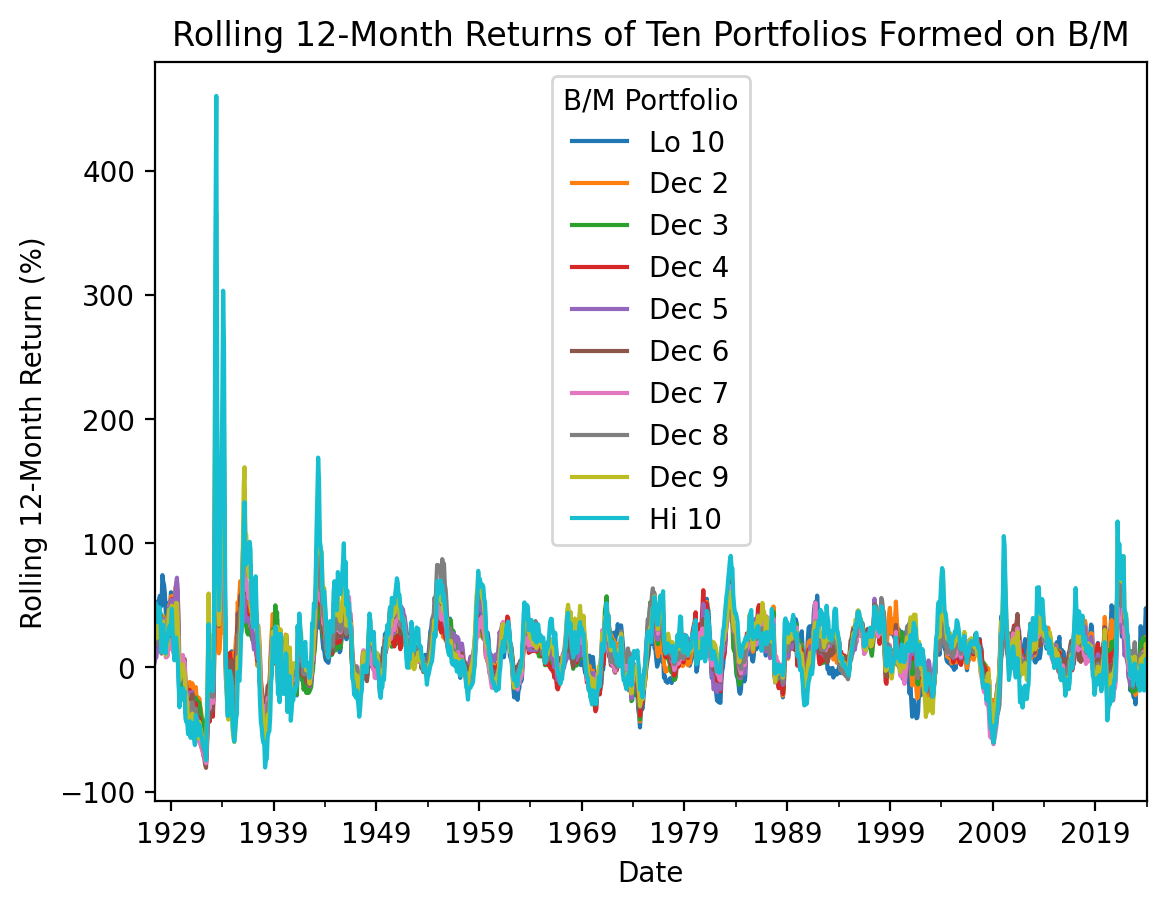

In [14]:
(
    be_me_vw
    .pipe(np.log1p) # calculate log returns
    .resample('M')
    .sum() # after this sum, we have monthly log returns
    .rolling(12) # rolling 12-month windows
    .sum() # after this sum, we have rolling 12-month log returns
    .pipe(np.expm1) # calculate simple returns
    .dropna()
    .mul(100) # convert to percent
    .plot()
)

plt.ylabel('Rolling 12-Month Return (%)')
plt.title('Rolling 12-Month Returns of Ten Portfolios Formed on B/M')
plt.show()

With the 12-month holding periods above, we cannot easily see the spread between value (Hi 10) and growth (Lo 10) returns.
So we can change the `.rolling(12)` to a `.rolling(30 * 12)` to calculate rolling 30-year returns.
We see that sometimes the value-growth spread is high, but the spread is about zero over the last 30 years.

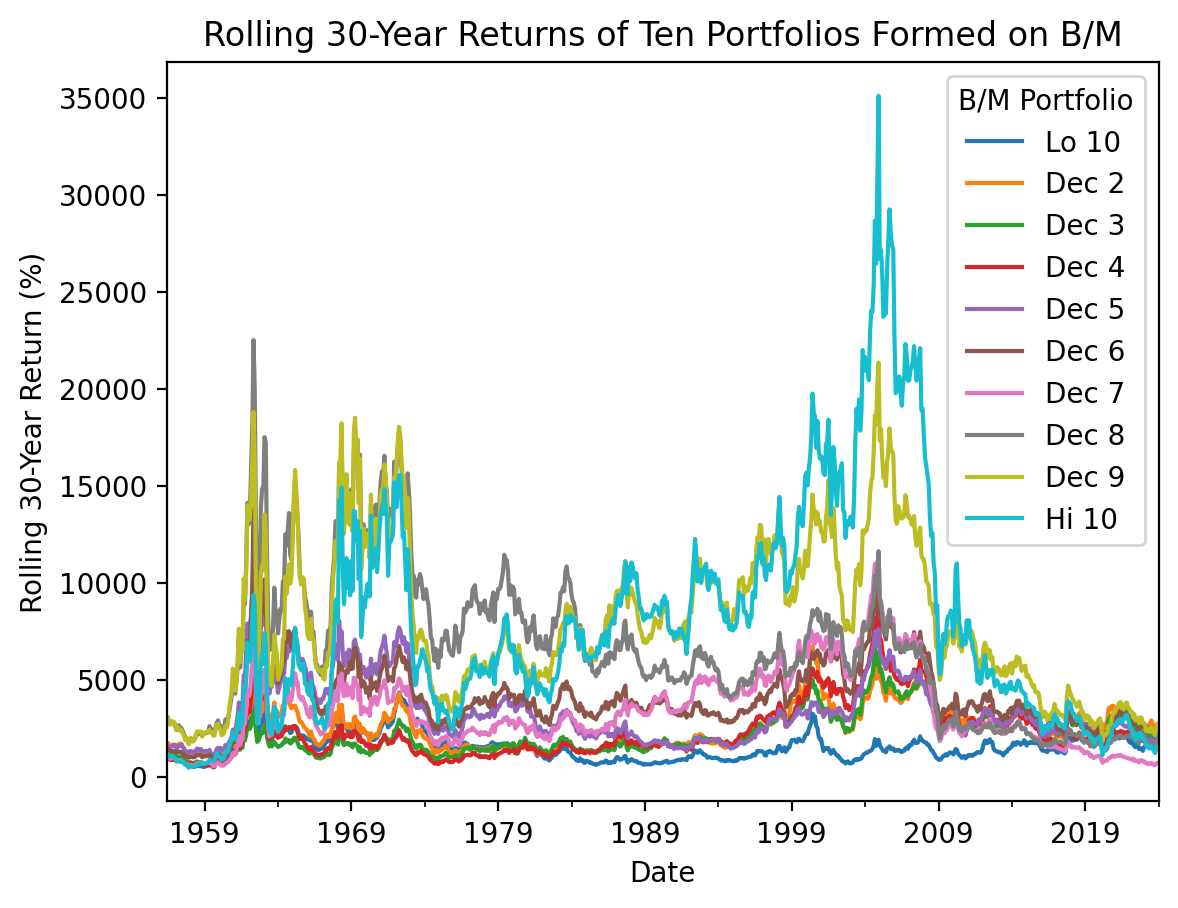

In [15]:
(
    be_me_vw
    .pipe(np.log1p) # calculate log returns
    .resample('M')
    .sum() # after this sum, we have monthly log returns
    .rolling(30 * 12) # rolling 30-year windows
    .sum() # after this sum, we have rolling 12-month log returns
    .pipe(np.expm1) # calculate simple returns
    .dropna()
    .mul(100) # convert to percent
    .plot()
)

plt.ylabel('Rolling 30-Year Return (%)')
plt.title('Rolling 30-Year Returns of Ten Portfolios Formed on B/M')
plt.show()

### Calculate Sharpe Ratios for each calendar year

We need the risk-free rate from Ken French's website to calculate Sharpe ratios!
The Sharpe Ratio is $S_i = \frac{\overline{r_i - r_f}}{\sigma_i}$, where $\overline{r_i-r_f}$ is mean fund return relative to the risk-free rate over some period and $\sigma_i$ is the standard deviation of $r_i-r_f$ over the same period.

In [16]:
ff_all = pdr.DataReader(
    name='F-F_Research_Data_Factors_daily',
    data_source='famafrench',
    start='1900'
)

ff = ff_all[0].div(100)

C:\Users\r.herron\AppData\Local\Temp\ipykernel_24516\2778589428.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_all = pdr.DataReader(


In [17]:
(
    be_me_vw
    .sub(ff['RF'], axis=0) # daily excess returns
    .resample('A') # downsample to annual
    .apply(lambda x: np.sqrt(252) * x.mean() / x.std()) # calculate Sharpe ratios
)

B/M Portfolio,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,
1926-12-31,1.0443,0.3296,2.4042,1.9237,0.2085,1.3751,1.4400,1.3200,0.5276,1.0035
1927-12-31,3.2226,1.8649,2.6625,1.7466,1.6240,2.1109,1.8806,1.6189,1.8466,1.6684
1928-12-31,1.9391,2.1740,2.2007,1.9249,2.1844,1.5118,0.8999,1.6722,1.3630,0.9255
1929-12-31,-0.6050,-0.1397,-0.2468,-0.1714,0.0009,-0.0349,-0.0684,-0.3532,-0.2792,-0.6170
1930-12-31,-0.9699,-0.7385,-1.0907,-1.3742,-1.3992,-1.6457,-2.3018,-2.0655,-2.3736,-2.1651
...,...,...,...,...,...,...,...,...,...,...
2020-12-31,1.2642,0.9832,0.7613,0.5393,0.3628,0.3973,-0.2304,0.1787,0.2889,0.0857
2021-12-31,1.2897,1.5796,1.9168,1.2979,0.9096,1.7713,1.4385,1.8281,1.5998,1.6404
2022-12-31,-0.9784,-0.9260,-0.7957,-0.3773,-0.4495,-0.6664,-0.0463,0.3953,0.0366,-0.0862


The annual data are noisy, because $r_i - r_f$ and $\sigma_i$ in a given year are poor estimates of the expected excess return and volatility.
A crude solution is to aggregate these data over the full sample.
We see that there is not a clear trend for the Sharpe ratio acress these portfolios.
We will revisit this when we learn the CAPM in a few weeks!

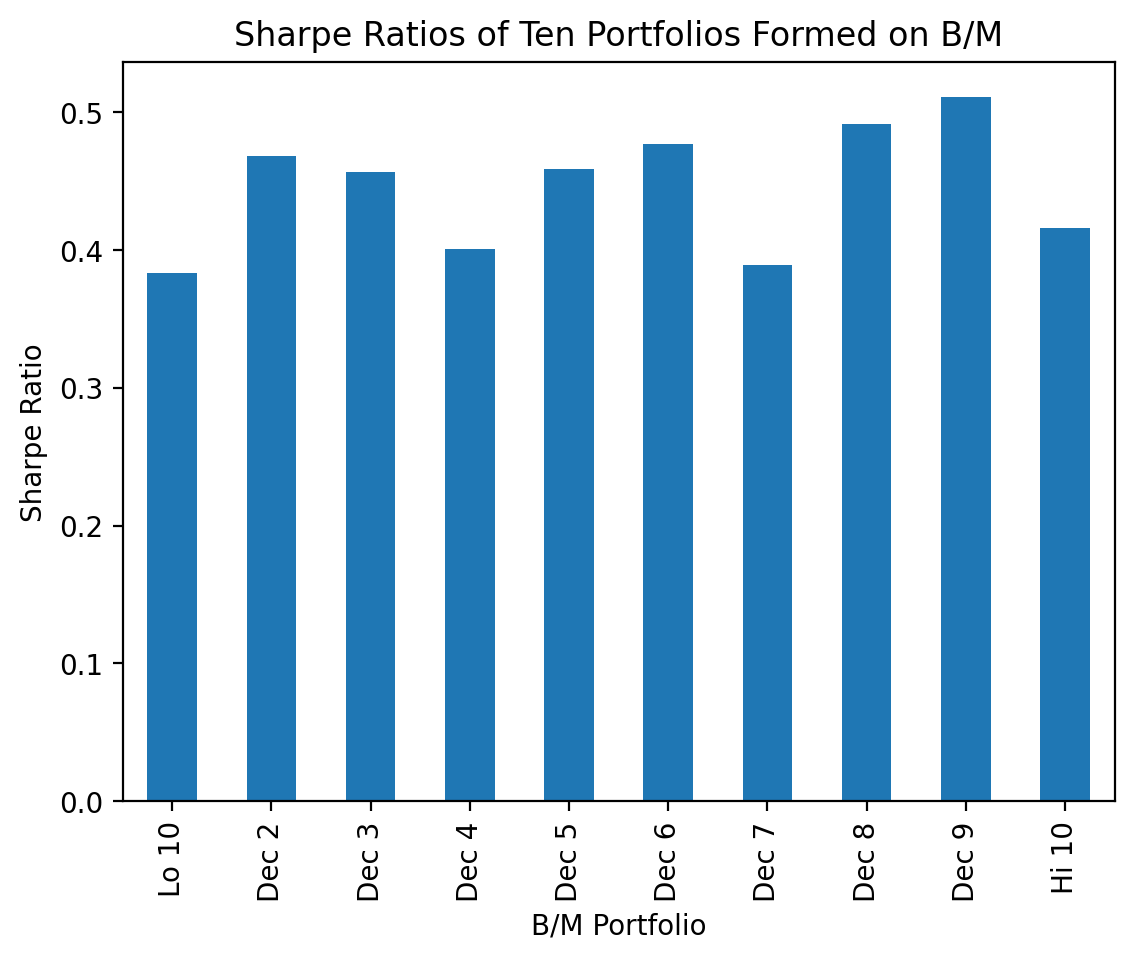

In [18]:
(
    be_me_vw
    .sub(ff['RF'], axis=0) # daily excess returns
    .apply(lambda x: np.sqrt(252) * x.mean() / x.std()) # calculate Sharpe ratios
    .plot(kind='bar')
)

plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratios of Ten Portfolios Formed on B/M')
plt.show()

### Calculate rolling betas

Calculate rolling capital asset pricing model (CAPM) betas for the ~~MATANA stocks~~ ten portfolios formed on B/M.

The CAPM says the risk premium on a stock depends on the risk-free rate, beta, and the risk premium on the market: $E(r_i) = r_f + \beta_i \times (E(r_M) - r_f)$.
We can calculate CAPM betas as: $\beta_i = \frac{Cov(r_i - r_f, r_M - r_f)}{Var(r_M - r_f)}$.
To speed up our calculations, we can use the rolling-optimized covariance and variance methods to calculate the numerator and denominator, respectively, then divide them to calculate beta.

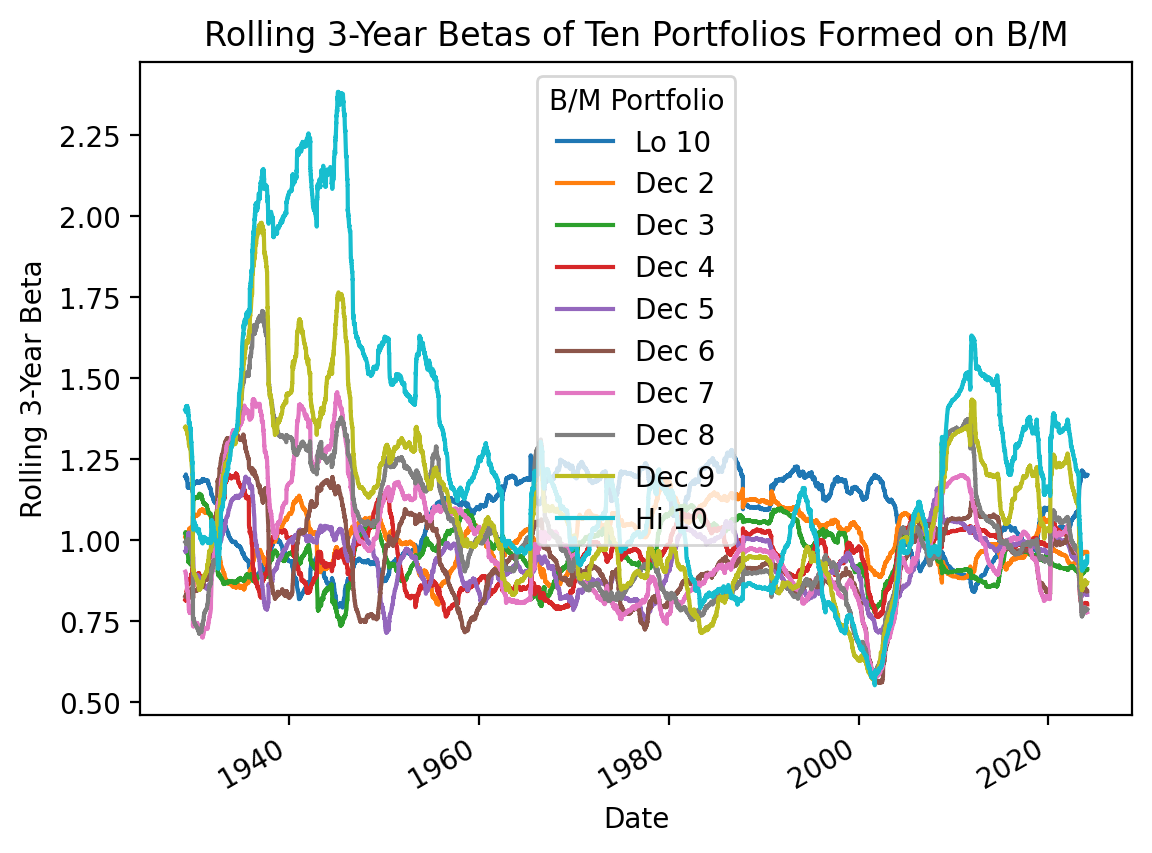

In [19]:
beta_top = be_me_vw.sub(ff['RF'], axis=0).rolling(252*3).cov(ff['Mkt-RF'])
beta_bottom = ff['Mkt-RF'].rolling(252*3).var()
beta = beta_top.div(beta_bottom, axis=0)
beta.plot()

plt.ylabel('Rolling 3-Year Beta')
plt.title('Rolling 3-Year Betas of Ten Portfolios Formed on B/M')
plt.show()

### Calculate rolling Sharpe Ratios

Calculate rolling Sharpe Ratios for the ~~MATANA stocks~~ ten portfolios formed on B/M.

We can copy our Sharpe ratio plot code above, and (1) add a `.rolling()` method before we `.apply()` the Sharpe ratio formula, and then (2) remove `kind='bar'` from our `.plot()` method.

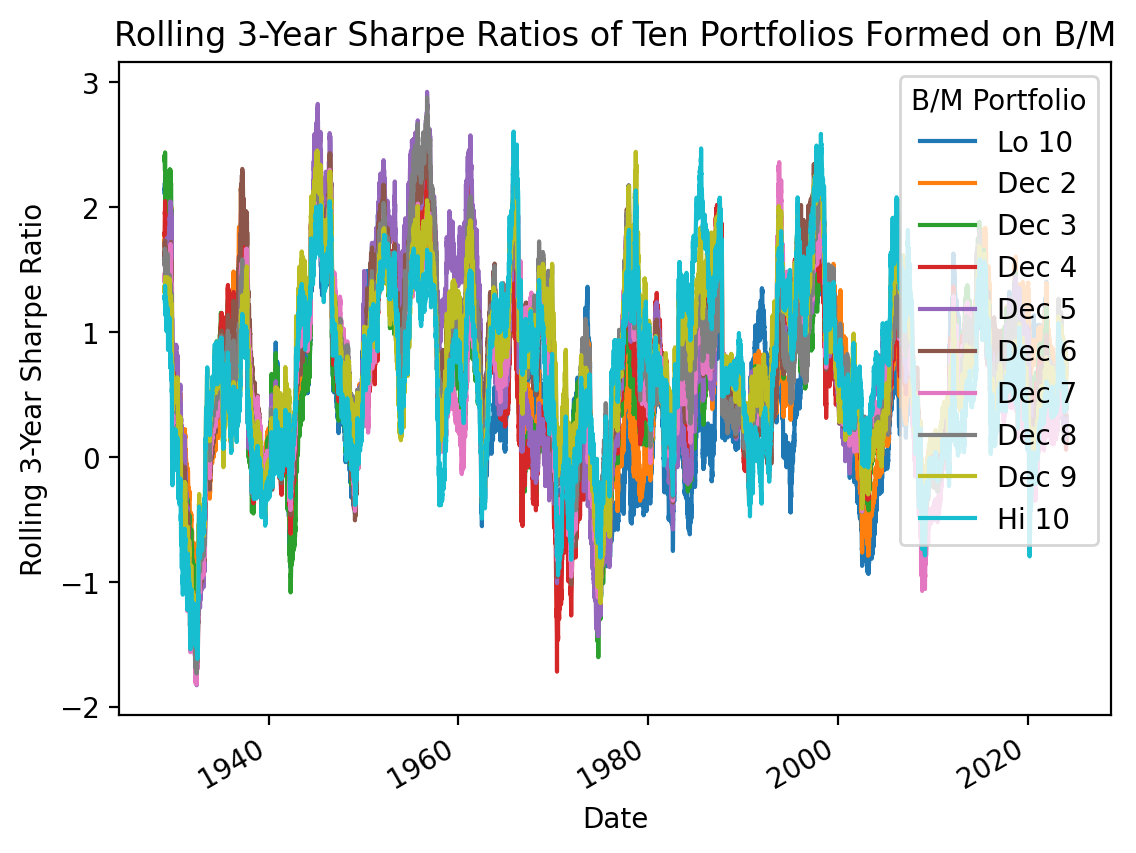

CPU times: total: 44 s
Wall time: 44.1 s


In [20]:
%%time
(
    be_me_vw
    .sub(ff['RF'], axis=0) # daily excess returns
    .rolling(3*252)
    .apply(lambda x: np.sqrt(252) * x.mean() / x.std()) # calculate Sharpe ratios
    .plot()
)

plt.ylabel('Rolling 3-Year Sharpe Ratio')
plt.title('Rolling 3-Year Sharpe Ratios of Ten Portfolios Formed on B/M')
plt.show()

But the code above is slow because the `.apply()` method is not rolling-optimized!
We can speed up our code by using the rolling-optimized `.mean()` and `.std()` methods.

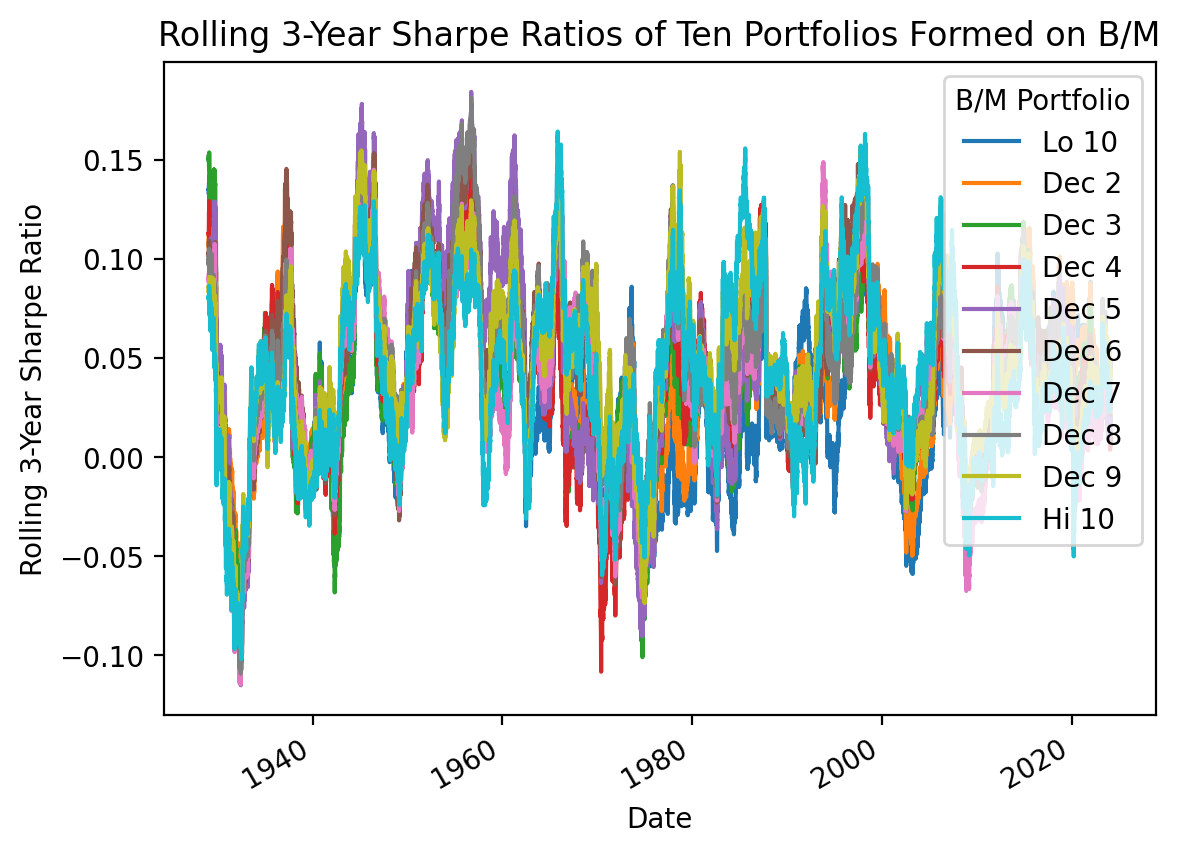

CPU times: total: 2.06 s
Wall time: 2.06 s


In [21]:
%%time

sharpe_top = be_me_vw.sub(ff['RF'], axis=0).rolling(3*252).mean()
sharpe_bottom = be_me_vw.sub(ff['RF'], axis=0).rolling(3*252).std()
sharpe = sharpe_top.div(sharpe_bottom, axis=0)
sharpe.plot()

plt.ylabel('Rolling 3-Year Sharpe Ratio')
plt.title('Rolling 3-Year Sharpe Ratios of Ten Portfolios Formed on B/M')
plt.show()